ДЗ 4 ML in business 

Вариант 1 (сделал только этот вариант)


1.Прочитайте базу my_PJME_MW.csv и сделайте ее перерасчет (ресемплинг) в представление по неделям.


2.Постройте модель предсказания 4-й точки от текущей (h = 4), используя результаты автокорреляционного анализа из предшествующих уроков .


3.Постройте модель предсказания 1-й точки от текущей (h = 1), используя результаты автокорреляционного анализа из предшествующих уроков.


4.Примените авторекурсию и сравните результат в 4-й точке путем прямого моделирования и путем рекурсивного моделирования на длине выборки из 4-х точек.


5.Оцените рост ошибки прогнозирования рекурсивной модели в интервалах от 1-й до 10-й, от 10-й до 20-й, от 20-й до 30-й, .. .10*i-й до (i+1)*10 -й,... ,от 90 до 100-й точках (используйте осреденение по десяткам точек)


6.Сделайте вывод о том, как изменилось поведение ошибки предсказания ряда.


Вариант 2


1.Прочитайте базу COVID19_data.csv .


2.Постройте модель предсказания 4-й точки от текущей (h = 4), используя результаты автокорреляционного анализа из предшествующих уроков .


3.Постройте модель предсказания 1-й точки от текущей (h = 1), используя результаты автокорреляционного анализа из предшествующих уроков.


4.Примените авторекурсию и сравните результат в 4-й точке путем прямого моделирования и путем рекурсивного моделирования на длине выборки из 4-х точек.


6.Оцените рост ошибки прогнозирования рекурсивной модели в интервалах от 1-й до 10-й точки


7.Сделайте вывод о том, как изменилось поведение ошибки предсказания ряда.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns


from sklearn.metrics import mean_squared_error
import os

pd.set_option('display.max_columns', None)

Загрузим файл с данными и посмотрим на таблицу их организующую.

In [2]:
#Path_Energy = 'PJME_hourly.csv'
Path_Energy = 'my_PJME_MW.csv'
data = pd.read_csv(Path_Energy, index_col=[0], parse_dates=[0])

data.head()

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0
2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0


In [3]:
data_w = data.copy().resample('W').mean()
data_w.head()

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,
2002-01-06,32392.160839,2002.0,1.000000,3.517483,1.0,3.517483,1.0,3.517483,11.58042,0.160839,0.000000,0.167832
2002-01-13,31487.386905,2002.0,1.000000,10.000000,1.0,10.000000,2.0,3.000000,11.50000,0.000000,0.000000,0.000000
2002-01-20,31452.880952,2002.0,1.000000,17.000000,1.0,17.000000,3.0,3.000000,11.50000,0.000000,0.142857,0.000000
2002-01-27,30141.529762,2002.0,1.000000,24.000000,1.0,24.000000,4.0,3.000000,11.50000,0.142857,0.000000,0.142857
2002-02-03,29196.488095,2002.0,1.428571,17.714286,1.0,31.000000,5.0,3.000000,11.50000,0.000000,0.000000,0.000000


C:\Users\LMAXL\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


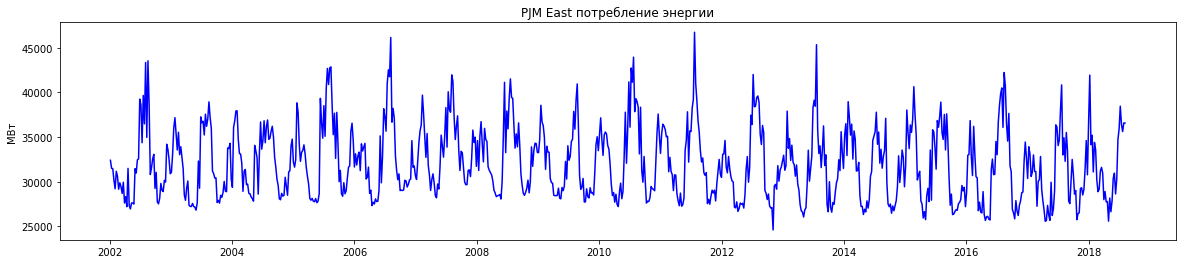

In [4]:
plt.figure(figsize =(20,4))
plt.plot( data_w.index, data_w['PJME_MW'], 'b' )
plt.title('PJM East потребление энергии' )
plt.ylabel ( 'МВт' )
plt.show()

Рис.1. Потребление энергии

## Генерация признаков

Удалим данные о часах и днях, т.к. они потеряли актуальность

In [5]:
data_w.drop(['hour','dayofweek','dayofmonth','dayofyear'], axis=1,inplace=True)
data_w.head()

,PJME_MW,year,month,quarter,weekofyear,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,
2002-01-06,32392.160839,2002.0,1.000000,1.0,1.0,0.160839,0.000000,0.167832
2002-01-13,31487.386905,2002.0,1.000000,1.0,2.0,0.000000,0.000000,0.000000
2002-01-20,31452.880952,2002.0,1.000000,1.0,3.0,0.000000,0.142857,0.000000
2002-01-27,30141.529762,2002.0,1.000000,1.0,4.0,0.142857,0.000000,0.142857
2002-02-03,29196.488095,2002.0,1.428571,1.0,5.0,0.000000,0.000000,0.000000


Категорийные признаки ['year','month','dayofmonth','quarter','dayofyear','weekofyear','dayofweek'] не стоит превращать в dummy-переменную, т.к. это приведет к значительному увеличению базы.
Поскольку в годовом развороте ряда тренда нет (временные ряды 2 и 3), то признак 'year' можно исключить.


In [6]:
data_w.drop('year', axis=1,inplace=True)

Можно построить интегральный признак используя кластер-анализ или частичную классификацию. Начнем с признака по кластер-анализу. Воспользуемся методом kmeans, если можем предположить сколько будет кластеров, или DBSCAN, который не требует знания реального числа кластеров. 

In [7]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE 
import seaborn as sns

scl=StandardScaler()
tsne_ =TSNE(n_components=2)

X = data_w.iloc[:,:-1].values

Xscale = scl.fit_transform(X)
X_t = tsne_.fit_transform(Xscale)



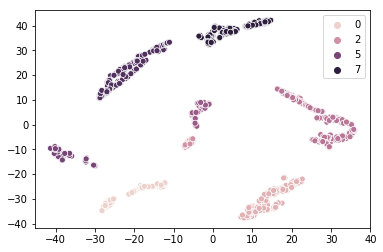

In [8]:
clast_0 = DBSCAN(eps=5, leaf_size=15 )
clast_1 = DBSCAN(eps=2, leaf_size=5)
X_clast =clast_0.fit_predict(X_t)
X_scale_clast =clast_1.fit_predict(Xscale)

sns.scatterplot(X_t[:,0],X_t[:,1], hue=X_clast)
plt.show()

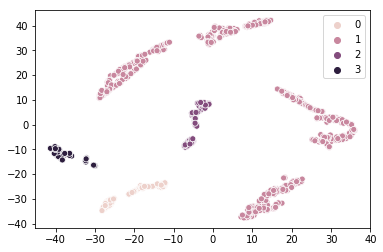

In [9]:
sns.scatterplot(X_t[:,0],X_t[:,1], hue=X_scale_clast)
plt.show()

Рис.3. Результат кластер-анализа признаков

In [10]:
print('Число кластеров в календаре с масштабированием: ',len(np.unique(X_scale_clast)))
print('Число кластеров в календаре: ',len(np.unique(X_clast)))

Число кластеров в календаре с масштабированием:  4
Число кластеров в календаре:  8


Вариант кластеризации с разметкой на рис.3 для случая масштабированных координат показывает отлично выделяемые кластеры с хорошим размещением объектов по группам. Принадлежность кластерам можно использовать в качестве нового признака и проверить качество обработки модели с новой координатой. В данном конкретном примере кластеризация без масштабирования, но с понижением размерности выглядит очень обосновано. Берем этот вариант за основу и добавим признак к общему описанию задачи. 

In [11]:
data_w['day_week_month'] = X_clast
data_w.iloc[np.where(data_w['day_week_month']==0)[0]].iloc[:10,:]

,PJME_MW,month,quarter,weekofyear,is_holiday,is_prev_holiday,is_next_holiday,day_week_month
Date,,,,,,,,
2002-01-06,32392.160839,1.000000,1.0,1.0,0.160839,0.0,0.167832,0
2002-01-27,30141.529762,1.000000,1.0,4.0,0.142857,0.0,0.142857,0
2002-02-24,29144.130952,2.000000,1.0,8.0,0.142857,0.0,0.142857,0
2002-06-02,31448.660714,5.285714,2.0,22.0,0.142857,0.0,0.142857,0
2002-09-08,31535.172619,9.000000,3.0,36.0,0.142857,0.0,0.142857,0
2002-10-20,27504.827381,10.000000,4.0,42.0,0.142857,0.0,0.142857,0
2002-11-17,28881.886905,11.000000,4.0,46.0,0.142857,0.0,0.142857,0
2003-01-26,37169.547619,1.000000,1.0,4.0,0.142857,0.0,0.142857,0
2003-02-23,33023.458333,2.000000,1.0,8.0,0.142857,0.0,0.142857,0


В выборке объектов типа 0 собраны недели с праздничными днями, а в типе 2 нового признака собрали недели с субботами перед праздником:).

In [12]:
data_w.iloc[np.where(data_w['day_week_month']==2)[0]].iloc[:10,:]

,PJME_MW,month,quarter,weekofyear,is_holiday,is_prev_holiday,is_next_holiday,day_week_month
Date,,,,,,,,
2002-01-20,31452.880952,1.0,1.0,3.0,0.0,0.142857,0.0,2
2002-02-17,30616.565476,2.0,1.0,7.0,0.0,0.142857,0.0,2
2003-01-19,35999.547619,1.0,1.0,3.0,0.0,0.142857,0.0,2
2003-02-16,35533.589286,2.0,1.0,7.0,0.0,0.142857,0.0,2
2004-01-18,36814.470238,1.0,1.0,3.0,0.0,0.142857,0.0,2
2004-02-15,33151.982143,2.0,1.0,7.0,0.0,0.142857,0.0,2
2005-01-16,32488.148810,1.0,1.0,2.0,0.0,0.142857,0.0,2
2005-02-20,33284.934524,2.0,1.0,7.0,0.0,0.142857,0.0,2
2006-01-15,31858.672619,1.0,1.0,2.0,0.0,0.142857,0.0,2


Применим метод главных компонент.

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, svd_solver='full')
Xpca=pca.fit_transform(Xscale[:,1:])
Xpca.shape

(866, 2)

In [14]:
data_w['pca1']=Xpca[:,0]
data_w['pca2']=Xpca[:,1]

Добавим новых признаков, описывающих содержание ряда. К таким признакам можно отнести разности ряда и разнообразные варианты сглаживания. Добавим к нашей модели 1-е разности. При этом следует помнить, что такие операции уменьшают общую длину корректной выборки на 1, т.е. первую строку данных следует исключить из модели в момент обучения.

In [15]:
first_diff =np.array(data_w.iloc[1:,0].values - data_w.iloc[:-1,0].values).astype('float32') 
data_w['diff1'] = 0
data_w['diff1'] =  data_w['diff1'].astype('float') 
data_w['diff1'].values[1:] = first_diff

Вообще можно добавить все, что можем придумать. Например, логарифм признака, частные признаков , частные логарифмов и т.д. 

In [16]:
first_diff_d =(first_diff) / data_w.iloc[1:,0].values
data_w['diff1_d'] = 0
data_w['diff1_d'] =  data_w['diff1_d'].astype('float') 
data_w['diff1_d'].values[1:] = np.array(first_diff_d).astype('float32')

In [65]:
data_w.head()

,PJME_MW,month,quarter,weekofyear,is_holiday,is_prev_holiday,is_next_holiday,day_week_month,pca1,pca2,diff1,diff1_d,diff1_l,d_w7,exp_0_05,exp_0_01,exp_0_03,exp_0_04,exp_0_06,exp_0_07,exp_0_08,exp_0_1,exp_0_3,exp_0_4,t13,t12,t11,t10,t9,t8,t7,t6,t5,t4,t3,t2,t1,d13,d12,d11,d10,d9,d8,d7,d6,d5,d4,d3,d2,d1
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2002-01-06,32392.160839,1.000000,1.0,1.0,0.160839,0.000000,0.167832,0,-2.454252,1.805922,0.000000,0.000000,0.000000,0.0,32392.160839,32392.160839,32392.160839,32392.160839,32392.160839,32392.160839,32392.160839,32392.160839,32392.160839,32392.160839,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2002-01-13,31487.386905,1.000000,1.0,2.0,0.000000,0.000000,0.000000,1,-2.716066,-0.229153,-904.773926,-0.028734,10.357342,0.0,32346.922142,32383.113100,32365.017621,32355.969882,32337.874403,32328.826664,32319.778924,32301.683446,32120.728659,32030.251265,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2002-01-20,31452.880952,1.000000,1.0,3.0,0.000000,0.142857,0.000000,2,-2.339530,1.514252,-34.505951,-0.001097,10.356246,0.0,32302.220083,32373.810778,32337.653521,32319.846325,32284.774796,32267.510464,32250.427087,32216.803196,31920.374347,31799.303140,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2002-01-27,30141.529762,1.000000,1.0,4.0,0.142857,0.000000,0.142857,0,-2.374173,1.558280,-1311.351196,-0.043506,10.313659,0.0,32194.185567,32351.487968,32271.769808,32232.713662,32156.180094,32118.691815,32081.715301,32009.275853,31386.720971,31136.193789,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2002-02-03,29196.488095,1.428571,1.0,5.0,0.000000,0.000000,0.000000,1,-2.530047,-0.263232,-945.041687,-0.032368,10.281804,0.0,32044.300693,32319.937969,32179.511357,32111.264639,31978.598574,31914.137554,31850.897124,31727.997077,30729.651109,30360.311511,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [64]:
data_w.iloc[1:,0]

Date
2002-01-13    31487.386905
2002-01-20    31452.880952
2002-01-27    30141.529762
2002-02-03    29196.488095
2002-02-10    31150.517857
                  ...     
2018-07-08    38459.982143
2018-07-15    36420.035714
2018-07-22    35612.095238
2018-07-29    36581.821429
2018-08-05    36568.804124
Freq: W-SUN, Name: PJME_MW, Length: 865, dtype: float64

In [17]:
first_diff_l =np.log(data_w.iloc[1:,0].values) 
data_w['diff1_l'] = 0
data_w['diff1_l'] =  data_w['diff1_l'].astype('float') 
data_w['diff1_l'].values[1:] = first_diff_l

Добавим скользящее среднее по всей модели с глубиной 13 недель. Размер окна определен длиной сезонных циклов.

In [18]:
data_w['d_w7']=data_w['PJME_MW'].rolling(window=13).mean()

А теперь добавим еще и экспонентциальную среднюю. Медленную, т.к. интересная информация лежит на уровне сезонных колебаний цены.

In [19]:
def exponential_smoothing(series, alpha):
    result = [series[0]] 
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

data_w['exp_0_05'] = exponential_smoothing(data_w['PJME_MW'], 0.05)


В итоге данные примут вид 

In [20]:
data_w.iloc[10:15,:]


,PJME_MW,month,quarter,weekofyear,is_holiday,is_prev_holiday,is_next_holiday,day_week_month,pca1,pca2,diff1,diff1_d,diff1_l,d_w7,exp_0_05
Date,,,,,,,,,,,,,,,
2002-03-17,28672.779762,3.0,1.0,11.0,0.0,0.0,0.0,1,-2.037281,-0.353362,-768.130981,-0.026790,10.263704,NaN,31436.852496
2002-03-24,29927.488095,3.0,1.0,12.0,0.0,0.0,0.0,1,-1.999420,-0.360328,1254.708374,0.041925,10.306533,NaN,31361.384276
2002-03-31,27595.869048,3.0,1.0,13.0,0.0,0.0,0.0,1,-1.961559,-0.367293,-2331.619141,-0.084492,10.225421,30083.670797,31173.108514
2002-04-07,28308.778443,4.0,2.0,14.0,0.0,0.0,0.0,3,-1.237759,-0.479240,712.909424,0.025183,10.250927,29769.564459,31029.892011
2002-04-14,27182.482143,4.0,2.0,15.0,0.0,0.0,0.0,3,-1.199898,-0.486205,-1126.296265,-0.041435,10.210328,29438.417939,30837.521517


In [21]:
data_w.iloc[:15,:]


,PJME_MW,month,quarter,weekofyear,is_holiday,is_prev_holiday,is_next_holiday,day_week_month,pca1,pca2,diff1,diff1_d,diff1_l,d_w7,exp_0_05
Date,,,,,,,,,,,,,,,
2002-01-06,32392.160839,1.000000,1.0,1.0,0.160839,0.000000,0.167832,0,-2.454252,1.805922,0.000000,0.000000,0.000000,NaN,32392.160839
2002-01-13,31487.386905,1.000000,1.0,2.0,0.000000,0.000000,0.000000,1,-2.716066,-0.229153,-904.773926,-0.028734,10.357342,NaN,32346.922142
2002-01-20,31452.880952,1.000000,1.0,3.0,0.000000,0.142857,0.000000,2,-2.339530,1.514252,-34.505951,-0.001097,10.356246,NaN,32302.220083
2002-01-27,30141.529762,1.000000,1.0,4.0,0.142857,0.000000,0.142857,0,-2.374173,1.558280,-1311.351196,-0.043506,10.313659,NaN,32194.185567
2002-02-03,29196.488095,1.428571,1.0,5.0,0.000000,0.000000,0.000000,1,-2.530047,-0.263232,-945.041687,-0.032368,10.281804,NaN,32044.300693
2002-02-10,31150.517857,2.000000,1.0,6.0,0.000000,0.000000,0.000000,1,-2.395604,-0.287775,1954.029785,0.062729,10.346586,NaN,31999.611551
2002-02-17,30616.565476,2.000000,1.0,7.0,0.000000,0.142857,0.000000,2,-2.019068,1.455630,-533.952393,-0.017440,10.329296,NaN,31930.459248
2002-02-24,29144.130952,2.000000,1.0,8.0,0.142857,0.000000,0.142857,0,-2.053711,1.499658,-1472.434570,-0.050523,10.280009,NaN,31791.142833
2002-03-03,29869.011905,2.428571,1.0,9.0,0.000000,0.000000,0.000000,1,-2.209585,-0.321854,724.880981,0.024269,10.304577,NaN,31695.036287


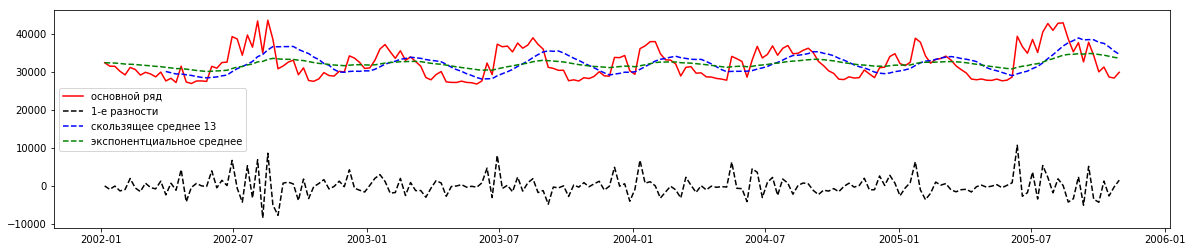

In [22]:
plt.figure(figsize =(20,4))
N100=200
plt.plot(data_w.index[:N100],data_w['PJME_MW'][:N100],'r',label ='основной ряд')
plt.plot(data_w.index[:N100],data_w['diff1'][:N100],'--k',label ='1-е разности')
plt.plot(data_w.index[:N100],data_w['d_w7'][:N100],'--b',label ='скользящее среднее 13')
plt.plot(data_w.index[:N100],data_w['exp_0_05'][:N100],'--g',label ='экспонентциальное среднее')
plt.legend()
plt.show()


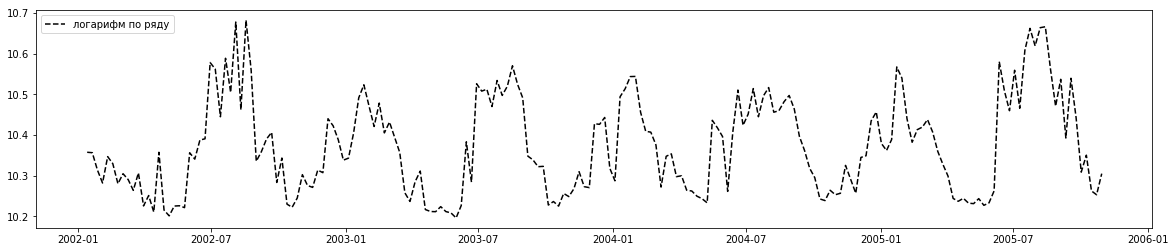

In [23]:
plt.figure(figsize =(20,4))
N100=200
plt.plot(data_w.index[1:N100],data_w['diff1_l'][1:N100],'--k',label ='логарифм по ряду')
plt.legend()
plt.show()

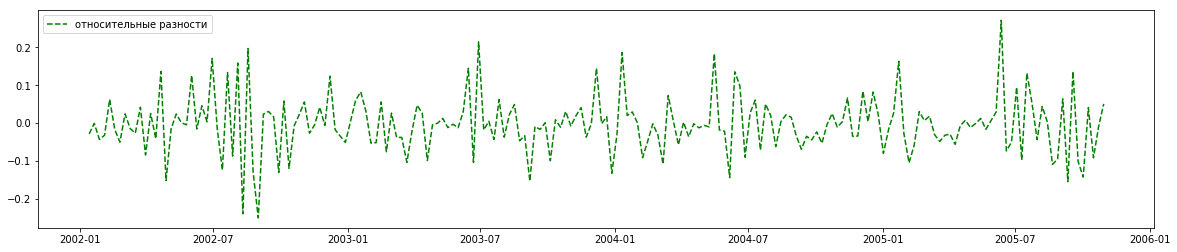

In [24]:
plt.figure(figsize =(20,4))
N100=200

plt.plot(data_w.index[1:N100],data_w['diff1_d'][1:N100],'--g',label ='относительные разности')
plt.legend()
plt.show()

Проблема состоит в том, что подобных признаков можно построить бесконечное количество. Для определения разумных интервалов имеет смысл вспомнить результаты анализа ряда в статистических моделях. Период сезонных колебаний 13 недель и недельный цикл по дням. Это позволит не строить все возможные сочетания параметров модели, а сократить их число до относительно небольшого подмножества. Посмотрим на примере экспоненциальных средних в диапазоне alpha = [0.01 - 0.4] 

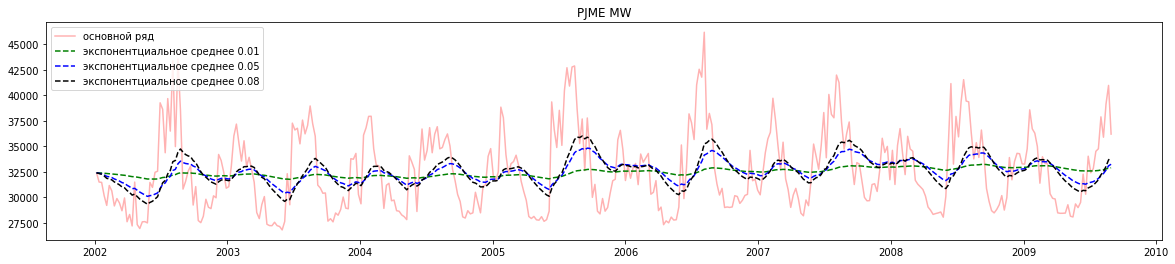

In [25]:
data_w['exp_0_01'] = exponential_smoothing(data_w['PJME_MW'], 0.01)
data_w['exp_0_03'] = exponential_smoothing(data_w['PJME_MW'], 0.03)
data_w['exp_0_04'] = exponential_smoothing(data_w['PJME_MW'], 0.04)
data_w['exp_0_06'] = exponential_smoothing(data_w['PJME_MW'], 0.06)
data_w['exp_0_07'] = exponential_smoothing(data_w['PJME_MW'], 0.07)
data_w['exp_0_08'] = exponential_smoothing(data_w['PJME_MW'], 0.08)

plt.figure(figsize =(20,4))

N100=400
plt.plot(data_w.index[:N100],data_w['PJME_MW'][:N100],'r',label ='основной ряд',alpha=0.3)
plt.plot(data_w.index[:N100],data_w['exp_0_01'][:N100],'--g',label ='экспонентциальное среднее 0.01')
plt.plot(data_w.index[:N100],data_w['exp_0_05'][:N100],'--b',label ='экспонентциальное среднее 0.05')
plt.plot(data_w.index[:N100],data_w['exp_0_08'][:N100],'--k',label ='экспонентциальное среднее 0.08')
plt.legend()
plt.title('PJME MW')
plt.show()

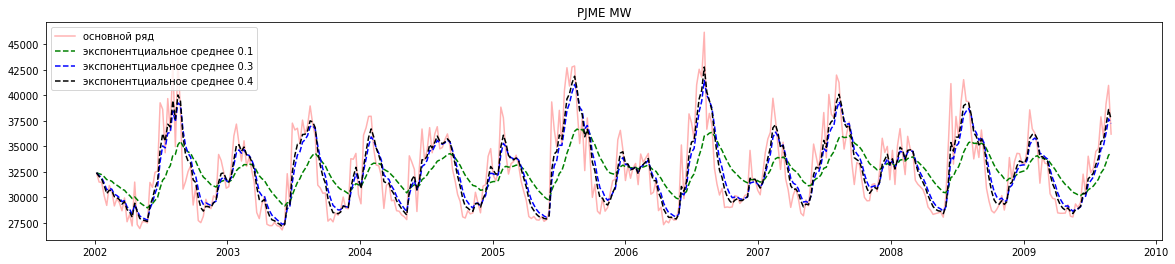

In [26]:
data_w['exp_0_1'] = exponential_smoothing(data_w['PJME_MW'], 0.1)
data_w['exp_0_3'] = exponential_smoothing(data_w['PJME_MW'], 0.3)
data_w['exp_0_4'] = exponential_smoothing(data_w['PJME_MW'], 0.4)

plt.figure(figsize =(20,4))

N100=400
plt.plot(data_w.index[:N100],data_w['PJME_MW'][:N100],'r',label ='основной ряд',alpha=0.3)
plt.plot(data_w.index[:N100],data_w['exp_0_1'][:N100],'--g',label ='экспонентциальное среднее 0.1')
plt.plot(data_w.index[:N100],data_w['exp_0_3'][:N100],'--b',label ='экспонентциальное среднее 0.3')
plt.plot(data_w.index[:N100],data_w['exp_0_4'][:N100],'--k',label ='экспонентциальное среднее 0.4')
plt.legend()
plt.title('PJME MW')
plt.show()

In [27]:
data_w.iloc[:12,13]=0

In [28]:
data_w.head(15)

,PJME_MW,month,quarter,weekofyear,is_holiday,is_prev_holiday,is_next_holiday,day_week_month,pca1,pca2,diff1,diff1_d,diff1_l,d_w7,exp_0_05,exp_0_01,exp_0_03,exp_0_04,exp_0_06,exp_0_07,exp_0_08,exp_0_1,exp_0_3,exp_0_4
Date,,,,,,,,,,,,,,,,,,,,,,,,
2002-01-06,32392.160839,1.000000,1.0,1.0,0.160839,0.000000,0.167832,0,-2.454252,1.805922,0.000000,0.000000,0.000000,0.000000,32392.160839,32392.160839,32392.160839,32392.160839,32392.160839,32392.160839,32392.160839,32392.160839,32392.160839,32392.160839
2002-01-13,31487.386905,1.000000,1.0,2.0,0.000000,0.000000,0.000000,1,-2.716066,-0.229153,-904.773926,-0.028734,10.357342,0.000000,32346.922142,32383.113100,32365.017621,32355.969882,32337.874403,32328.826664,32319.778924,32301.683446,32120.728659,32030.251265
2002-01-20,31452.880952,1.000000,1.0,3.0,0.000000,0.142857,0.000000,2,-2.339530,1.514252,-34.505951,-0.001097,10.356246,0.000000,32302.220083,32373.810778,32337.653521,32319.846325,32284.774796,32267.510464,32250.427087,32216.803196,31920.374347,31799.303140
2002-01-27,30141.529762,1.000000,1.0,4.0,0.142857,0.000000,0.142857,0,-2.374173,1.558280,-1311.351196,-0.043506,10.313659,0.000000,32194.185567,32351.487968,32271.769808,32232.713662,32156.180094,32118.691815,32081.715301,32009.275853,31386.720971,31136.193789
2002-02-03,29196.488095,1.428571,1.0,5.0,0.000000,0.000000,0.000000,1,-2.530047,-0.263232,-945.041687,-0.032368,10.281804,0.000000,32044.300693,32319.937969,32179.511357,32111.264639,31978.598574,31914.137554,31850.897124,31727.997077,30729.651109,30360.311511
2002-02-10,31150.517857,2.000000,1.0,6.0,0.000000,0.000000,0.000000,1,-2.395604,-0.287775,1954.029785,0.062729,10.346586,0.000000,31999.611551,32308.243768,32148.641552,32072.834768,31928.913731,31860.684176,31794.866783,31670.249155,30855.911133,30676.394050
2002-02-17,30616.565476,2.000000,1.0,7.0,0.000000,0.142857,0.000000,2,-2.019068,1.455630,-533.952393,-0.017440,10.329296,0.000000,31930.459248,32291.326985,32102.679270,32014.583996,31850.172836,31773.595867,31700.602678,31564.880787,30784.107436,30652.462620
2002-02-24,29144.130952,2.000000,1.0,8.0,0.142857,0.000000,0.142857,0,-2.053711,1.499658,-1472.434570,-0.050523,10.280009,0.000000,31791.142833,32259.855025,32013.922820,31899.765875,31687.810323,31589.533323,31496.084940,31322.805804,30292.114491,30049.129953
2002-03-03,29869.011905,2.428571,1.0,9.0,0.000000,0.000000,0.000000,1,-2.209585,-0.321854,724.880981,0.024269,10.304577,0.000000,31695.036287,32235.946594,31949.575493,31818.535716,31578.682418,31469.096823,31365.919097,31177.426414,30165.183715,29977.082734


Добавим истории длиной p в признаках автокорреляции

In [29]:
p = 13
for i in range(p):
    data_w['t'+str(p-i)]=0
    data_w['t'+str(p-i)].values[p:] = data_w['PJME_MW'].values[i:-(p)+i]

Аналогично добавляем первые разности на глубину p

In [30]:
p = 13
for i in range(p):
    data_w['d'+str(p-i)]=0
    data_w['d'+str(p-i)].values[p:] = data_w['diff1'].values[i:-(p)+i]

Итоговая система признаков

In [66]:
data_w.head(20)

,PJME_MW,month,quarter,weekofyear,is_holiday,is_prev_holiday,is_next_holiday,day_week_month,pca1,pca2,diff1,diff1_d,diff1_l,d_w7,exp_0_05,exp_0_01,exp_0_03,exp_0_04,exp_0_06,exp_0_07,exp_0_08,exp_0_1,exp_0_3,exp_0_4,t13,t12,t11,t10,t9,t8,t7,t6,t5,t4,t3,t2,t1,d13,d12,d11,d10,d9,d8,d7,d6,d5,d4,d3,d2,d1
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2002-01-06,32392.160839,1.000000,1.0,1.0,0.160839,0.000000,0.167832,0,-2.454252,1.805922,0.000000,0.000000,0.000000,0.000000,32392.160839,32392.160839,32392.160839,32392.160839,32392.160839,32392.160839,32392.160839,32392.160839,32392.160839,32392.160839,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2002-01-13,31487.386905,1.000000,1.0,2.0,0.000000,0.000000,0.000000,1,-2.716066,-0.229153,-904.773926,-0.028734,10.357342,0.000000,32346.922142,32383.113100,32365.017621,32355.969882,32337.874403,32328.826664,32319.778924,32301.683446,32120.728659,32030.251265,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2002-01-20,31452.880952,1.000000,1.0,3.0,0.000000,0.142857,0.000000,2,-2.339530,1.514252,-34.505951,-0.001097,10.356246,0.000000,32302.220083,32373.810778,32337.653521,32319.846325,32284.774796,32267.510464,32250.427087,32216.803196,31920.374347,31799.303140,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2002-01-27,30141.529762,1.000000,1.0,4.0,0.142857,0.000000,0.142857,0,-2.374173,1.558280,-1311.351196,-0.043506,10.313659,0.000000,32194.185567,32351.487968,32271.769808,32232.713662,32156.180094,32118.691815,32081.715301,32009.275853,31386.720971,31136.193789,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2002-02-03,29196.488095,1.428571,1.0,5.0,0.000000,0.000000,0.000000,1,-2.530047,-0.263232,-945.041687,-0.032368,10.281804,0.000000,32044.300693,32319.937969,32179.511357,32111.264639,31978.598574,31914.137554,31850.897124,31727.997077,30729.651109,30360.311511,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2002-02-10,31150.517857,2.000000,1.0,6.0,0.000000,0.000000,0.000000,1,-2.395604,-0.287775,1954.029785,0.062729,10.346586,0.000000,31999.611551,32308.243768,32148.641552,32072.834768,31928.913731,31860.684176,31794.866783,31670.249155,30855.911133,30676.394050,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2002-02-17,30616.565476,2.000000,1.0,7.0,0.000000,0.142857,0.000000,2,-2.019068,1.455630,-533.952393,-0.017440,10.329296,0.000000,31930.459248,32291.326985,32102.679270,32014.583996,31850.172836,31773.595867,31700.602678,31564.880787,30784.107436,30652.462620,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2002-02-24,29144.130952,2.000000,1.0,8.0,0.142857,0.000000,0.142857,0,-2.053711,1.499658,-1472.434570,-0.050523,10.280009,0.000000,31791.142833,32259.855025,32013.922820,31899.765875,31687.810323,31589.533323,31496.084940,31322.805804,30292.114491,30049.129953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2002-03-03,29869.011905,2.428571,1.0,9.0,0.000000,0.000000,0.000000,1,-2.209585,-0.321854,724.880981,0.024269,10.304577,0.000000,31695.036287,32235.946594,31949.575493,31818.535716,31578.682418,31469.096823,31365.919097,31177.426414,30165.183715,29977.082734,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Выделение существенных признаков

Запишем итоговую систему признаков и проведем ее анализ. Горизонт прогнозирования h = 1, тогда target = y(t+h)=y(t+1) 

In [32]:
scl_target=StandardScaler() 
# p = 7
h=1
target = data_w['PJME_MW'].values[h+p:].reshape((data_w.shape[0]-h-p,1))
y = scl_target.fit_transform(target)
y.shape

(852, 1)

Входной набор признаков берем из нашей таблицы. Необходимо помнить, что у нас есть интегральные признаки (для календаря), которые связаны с базовыми признаками. Обычно такие признаки рассматривают отдельно. Однако для эксперимента оставим все признаки для процедуры селекции.

In [33]:
scl_x=StandardScaler() 

X = data_w.iloc[p:-h,:].values
X = scl_x.fit_transform(X.astype('float64'))
X.shape

(852, 50)

In [35]:
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import SelectFromModel

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.feature_selection import f_regression, mutual_info_regression

f_test, _ = f_regression(X, y.ravel())
f_test /= np.max(f_test)
for i in range(X.shape[1]):
    print("F-test={:.2f},  I={}".format(f_test[i],i))


F-test=0.97,  I=0
F-test=0.00,  I=1
F-test=0.00,  I=2
F-test=0.00,  I=3
F-test=0.00,  I=4
F-test=0.00,  I=5
F-test=0.00,  I=6
F-test=0.01,  I=7
F-test=0.00,  I=8
F-test=0.00,  I=9
F-test=0.02,  I=10
F-test=0.01,  I=11
F-test=1.00,  I=12
F-test=0.00,  I=13
F-test=0.02,  I=14
F-test=0.01,  I=15
F-test=0.01,  I=16
F-test=0.02,  I=17
F-test=0.03,  I=18
F-test=0.04,  I=19
F-test=0.05,  I=20
F-test=0.07,  I=21
F-test=0.46,  I=22
F-test=0.67,  I=23
F-test=0.27,  I=24
F-test=0.29,  I=25
F-test=0.27,  I=26
F-test=0.19,  I=27
F-test=0.12,  I=28
F-test=0.06,  I=29
F-test=0.01,  I=30
F-test=0.00,  I=31
F-test=0.02,  I=32
F-test=0.07,  I=33
F-test=0.15,  I=34
F-test=0.30,  I=35
F-test=0.51,  I=36
F-test=0.00,  I=37
F-test=0.00,  I=38
F-test=0.00,  I=39
F-test=0.01,  I=40
F-test=0.01,  I=41
F-test=0.02,  I=42
F-test=0.03,  I=43
F-test=0.04,  I=44
F-test=0.04,  I=45
F-test=0.04,  I=46
F-test=0.03,  I=47
F-test=0.02,  I=48
F-test=0.02,  I=49


Проверка через F-test показывает, что есть корреляционная связь с предшествующим значением ряда (признак X[:,0]), а кроме этого интересные признаки  от 14 до 21. Применим автоматизацию выбора через SelectKBest c выделением 5 лучших признаков.

In [36]:
sfk =SelectKBest(f_regression, k=5)
X_new1 =sfk.fit_transform(X, y.ravel())
X_new1.shape

(852, 5)

In [37]:
column_names = data_w.columns[sfk.get_support()]
column_names

Index(['PJME_MW', 'diff1_l', 'exp_0_3', 'exp_0_4', 't1'], dtype='object')

In [38]:
X_new1[295:300,:]

array([[ 0.13289802,  0.19664787, -0.20349553, -0.16518039, -0.38387287],
       [ 0.91913395,  0.95261756,  0.21464984,  0.33802108,  0.13550963],
       [ 0.56948423,  0.62498016,  0.37216349,  0.4742315 ,  0.9217102 ],
       [ 0.71948189,  0.7671371 ,  0.54041795,  0.62704656,  0.57212102],
       [-0.09928192, -0.04057242,  0.34163029,  0.33069657,  0.72215929]])

Лучшее множество признаков отделено в X_new1. Проверим результат оценки признаков по процентному отбору и сохраним его в X_new2.

In [39]:
sfp=SelectPercentile(f_regression, percentile=10)
X_new2 = sfp.fit_transform(X, y.ravel())
X_new2.shape

(852, 5)

In [40]:
column_namesp = data_w.columns[sfp.get_support()]
column_namesp

Index(['PJME_MW', 'diff1_l', 'exp_0_3', 'exp_0_4', 't1'], dtype='object')

Наконец, третий вариант - применим выделение признаков через построение модели. Помним, что модель должна уметь выбрать подмножество признаков или вернуть коэффициент их влиятельности. Это ограничивает выбор моделей. Возьмем как оценшик GradientBoostingRegressor и построим новое пространство в X_new3

In [41]:
gr_model = GradientBoostingRegressor(max_depth=5, random_state=40, n_estimators=100).fit(X, y.ravel())
sfm = SelectFromModel(gr_model,  max_features = 10)

sfm.fit(X, y.ravel())
X_new3 = sfm.transform(X)
X_new3.shape

(852, 7)

Сравним результаты:


In [42]:
[X_new1[10:15,:], X_new2[10:15,:],X_new3[10:15,:]]

[array([[ 0.0843064 ,  0.14756469, -0.55130305, -0.35294094, -0.28384736],
        [ 0.11010632,  0.1736621 , -0.34161681, -0.15805997,  0.08699725],
        [ 1.78805972,  1.71440918,  0.45392528,  0.75410575,  0.11275382],
        [ 1.63030258,  1.58124532,  0.94980973,  1.2266389 ,  1.79068189],
        [ 0.56313881,  0.61891189,  0.88432203,  1.00439489,  1.63289164]]),
 array([[ 0.0843064 ,  0.14756469, -0.55130305, -0.35294094, -0.28384736],
        [ 0.11010632,  0.1736621 , -0.34161681, -0.15805997,  0.08699725],
        [ 1.78805972,  1.71440918,  0.45392528,  0.75410575,  0.11275382],
        [ 1.63030258,  1.58124532,  0.94980973,  1.2266389 ,  1.79068189],
        [ 0.56313881,  0.61891189,  0.88432203,  1.00439489,  1.63289164]]),
 array([[ 0.0843064 ,  0.14756469, -0.35294094, -0.53728302, -1.12010537,
         -1.22195113, -0.1442655 ],
        [ 0.11010632,  0.1736621 , -0.15805997, -1.1227561 , -0.94129325,
         -0.143714  , -1.18918527],
        [ 1.78805972,  1.7

In [43]:
list_param_k =np.where(sfk.get_support())[0]
list_param_p =np.where(sfp.get_support())[0]
list_param_m =np.where(sfm.get_support())[0]

print('Номера признаков k лучших признаков : ',list_param_k)
print('Номера признаков лучших признаков по процентной форме: ',list_param_p)
print('Номера признаков для выбора по модели : ',list_param_m)

Номера признаков k лучших признаков :  [ 0 12 22 23 36]
Номера признаков лучших признаков по процентной форме:  [ 0 12 22 23 36]
Номера признаков для выбора по модели :  [ 0 12 23 25 26 28 29]


Пересечение выбора по отбору для модели и по количественным оценкам связи в признаке 0. Имеет смысл брать объединение выборов. Возьмем [ 0 12 23 25 26 28 29 36] признаки (22 не взял, т.к. он очень похож на 23) и перейдем к построению модели.

In [44]:
list_par=[ 0, 12, 23, 25, 26, 28, 29, 36]
X_new = X[:,list_par]
data_w.columns[list_par]

Index(['PJME_MW', 'diff1_l', 'exp_0_4', 't12', 't11', 't9', 't8', 't1'], dtype='object')


## Разделение данных на тестовые и тренировочные 

Построение модели начинаем с выделения тестовой части нашего ряда. Напомним, что для временных рядов тест - непрерывная часть ряда не входившая в обучение (временные ряды 1). Будем отделять по индексу, который задаст дату разделения модели на тест и обучение.

In [45]:
# сделаем функцию
def split_data( data, split_date ):
    return data.loc[data.index.get_level_values('Date') <= split_date].copy(), \
           data.loc[data.index.get_level_values('Date') >  split_date].copy()

Для временного ряда "Потребление энергии" назначим датой разделения 2016-05-29

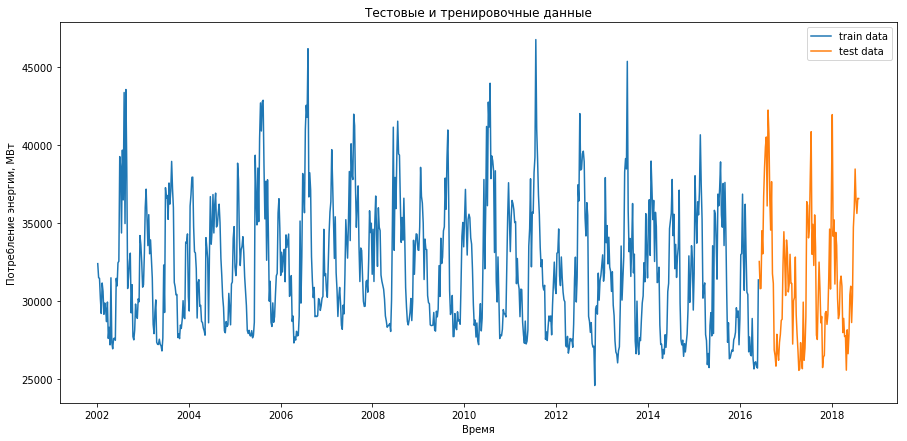

In [46]:
train, test = split_data( data_w, '2016-05-29')

plt.figure( figsize=( 15, 7 ))
plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(train.index.get_level_values('Date'),train['PJME_MW'], label='train data' )
plt.plot(test.index.get_level_values('Date'),test['PJME_MW'], label='test data')
plt.title( 'Тестовые и тренировочные данные' )
plt.legend()
plt.show()

In [47]:
X_train =X_new[:train.shape[0],:]
y_train =y[:train.shape[0],0]
X_test =X_new[train.shape[0]:,:]
y_test =y[train.shape[0]:,0]

In [48]:
train.shape

(752, 50)

# Строим Модель

In [49]:
from sklearn.ensemble import GradientBoostingRegressor

In [50]:
model_g = GradientBoostingRegressor(max_depth=5, random_state=0, n_estimators=100)

Запускаем модели и смотрим , что они построят на наших примерах.

In [51]:
model_g.fit( X_train, y_train ) # 

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=0, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

**Посмотрим тесты**

In [52]:
X_test.shape

(100, 8)

In [53]:
y_test_pred_g = model_g.predict(X_test)

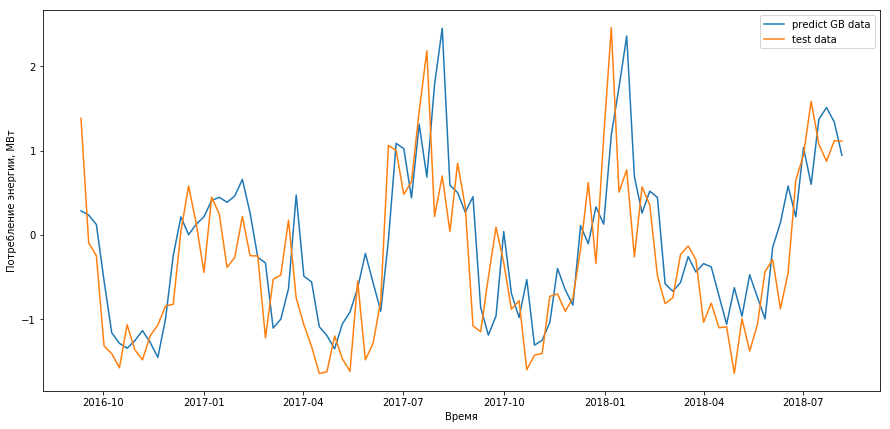

In [54]:

plt.figure( figsize=( 15, 7 ))


plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(test.index[h+p:],y_test_pred_g, label='predict GB data' )
plt.plot(test.index[h+p:],y_test, label='test data')

plt.legend()
plt.show()

**Оценки для сравнения моделей**

Оценим промах модели, используя метрики, которые можно применять для оценки регрессий https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics:
- средне-квадратичное отклонение
- среднюю абсолютную ошибку
- коэфиициент детерминации 

In [55]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


In [56]:
er_s = mean_squared_error(y_true=y_test, y_pred=y_test_pred_g) 
er_a = mean_absolute_error(y_true=y_test, y_pred=y_test_pred_g) 
er_r2 = r2_score(y_true=y_test, y_pred=y_test_pred_g)

print('ошибка mse :  ', er_s,'\nошибка mae  :  ', er_a,'\nоценка R2 :  ', er_r2)

ошибка mse :   0.4540360293507885 
ошибка mae  :   0.5289683647223153 
оценка R2 :   0.46930248450871925


Абсолютная процентная ошибка (MAPE).Обратите внимание, что определять ее для масштабированной переменной не верно. Пожэтому переведем ответ решателя обратно в состояние без масштаба.

In [57]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [58]:
er_g = mean_absolute_percentage_error(y_true=scl_target.inverse_transform( y_test),y_pred = scl_target.inverse_transform( y_test_pred_g))

print('ошибка градиентного бустинга MAPE :  ', er_g,'%')

ошибка градиентного бустинга MAPE :   6.856816865292578 %


Ошибка неплоха, но мы имеем дело с маленьким горизонтом прогноза и тем неменее пока точность предсказания лишь чуть превышает 93%. 
Построим более точную модель с использованием поиска моделей. Воспользуемся методом поиска 

In [59]:
from sklearn.model_selection import RandomizedSearchCV

def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

param_dist = {"max_depth": [3, 2,1,4,5], 
              "n_estimators":[100,200,300,400,500]}

#  randomized search
n_iter_search = 10

model_gr =GradientBoostingRegressor()

random_search = RandomizedSearchCV(model_gr, param_distributions=param_dist, n_iter=n_iter_search, cv=5, iid=False)

random_search.fit(X_train, y_train)

report(random_search.cv_results_)

Model with rank: 1
Mean validation score: 0.669 (std: 0.054)
Parameters: {'n_estimators': 100, 'max_depth': 1}

Model with rank: 2
Mean validation score: 0.655 (std: 0.047)
Parameters: {'n_estimators': 200, 'max_depth': 2}

Model with rank: 3
Mean validation score: 0.641 (std: 0.052)
Parameters: {'n_estimators': 300, 'max_depth': 2}



Выбираем модель с рангом 1. {'n_estimators': 100, 'max_depth': 2} и проведем ее обучение на тренировочном наборе.

In [60]:
model_g_best = GradientBoostingRegressor(max_depth=2,  n_estimators=100)
model_g_best.fit( X_train, y_train ) 
y_test_pred_g = model_g_best.predict(X_test)

er_g = mean_absolute_percentage_error(y_true=scl_target.inverse_transform( y_test),y_pred = scl_target.inverse_transform( y_test_pred_g))
print('ошибка градиентного бустинга MAPE :  ', er_g,'%')

ошибка градиентного бустинга MAPE :   6.696173039655571 %


Качество решения задачи по MAPE немного повысилось. Очевидно, что диапазон вариаций значений был довольно узким и есть возможность поискать решение в более широком выборе параметров и их значений. Кроме того, провели всего 10 итераций поиска, что также не позволяет гарантировать идеальный ответ. 

## Сохранение модели

In [61]:
import pickle
# save the model to disk
filename = 'final_model1.sav'
pickle.dump(model_g_best, open(filename, 'wb'))

filename = 'final_scaler_y1.sav'
pickle.dump(scl_target, open(filename, 'wb'))

filename = 'final_scaler_x1.sav'
pickle.dump(scl_x, open(filename, 'wb'))


## Использование модели для предсказания n*h моментов времени

Мы построили короткий прогноз, но его можно продолжить на следующие точки ряда. Для этого будем использовать результаты прогноза для следующего шага.  Необходимо заменять X_test[t+i, 0] = y_test[t+i-1] и продолжить моделирование в новом состоянии. Сделаем 4 дня прогноза.

In [88]:
diff1_l_scl_mean = scl_x.mean_[12] # Для обратного масштабирования diff1_l нужны параметры

In [87]:
diff1_l_scl_var = scl_x.var_[12]

In [89]:
#['PJME_MW', 'diff1_l', 'exp_0_4', 't12', 't11', 't9', 't8', 't1']

X_test_100 = X_test.copy()
y_test_100 = y_test_pred_g.copy()
N10 = 4
for i in range(N10):
    y_test_100[i] = model_g_best.predict(X_test_100[i,:].reshape((1,8)))
    # заполняем вектор для прогноза следующей точки
    X_test_100[i+1,0] = y_test_100[i]
    X_test_100[i+1,1] = (np.log(X_test_100[i,0] * diff1_l_scl_var + diff1_l_scl_mean) - diff1_l_scl_mean) / diff1_l_scl_var
    #scl_x.transform(np.log(scl_x.inverse_transform(X_test_100[i,0]))) не сработало,
    #т.к. для корректной работы размерность нужна первоначальная (50 колонок)
    X_test_100[i+1,2] = X_test_100[i+1,0]*(1-0.4)+ 0.4 * X_test_100[i,2] 
    X_test_100[i+1,3] = X_test_100[i+1-12,0]
    X_test_100[i+1,4] = X_test_100[i+1-11,0]
    X_test_100[i+1,5] = X_test_100[i+1-9,0]
    X_test_100[i+1,6] = X_test_100[i+1-8,0]
    X_test_100[i+1,7] = X_test_100[i+1-1,0]

In [91]:
er_g = mean_absolute_percentage_error(y_true=scl_target.inverse_transform( y_test[:N10]),y_pred = scl_target.inverse_transform( y_test_100[:N10]))
print('ошибка градиентного бустинга MAPE :  ', er_g,'%')

ошибка градиентного бустинга MAPE :   6.4141493870965265 %


## Выделение существенных признаков (h=4)

Запишем итоговую систему признаков и проведем ее анализ. Горизонт прогнозирования h = 4, тогда target = y(t+h)=y(t+4) 

In [92]:
scl_target=StandardScaler() 
# p = 7
h=4
target = data_w['PJME_MW'].values[h+p:].reshape((data_w.shape[0]-h-p,1))
y = scl_target.fit_transform(target)
y.shape

(849, 1)

Входной набор признаков берем из нашей таблицы. Необходимо помнить, что у нас есть интегральные признаки (для календаря), которые связаны с базовыми признаками. Обычно такие признаки рассматривают отдельно. Однако для эксперимента оставим все признаки для процедуры селекции.

In [93]:
scl_x=StandardScaler() 

X = data_w.iloc[p:-h,:].values
X = scl_x.fit_transform(X.astype('float64'))
X.shape

(849, 50)

In [94]:
f_test, _ = f_regression(X, y.ravel())
f_test /= np.max(f_test)
for i in range(X.shape[1]):
    print("F-test={:.2f},  I={}".format(f_test[i],i))


F-test=0.53,  I=0
F-test=0.01,  I=1
F-test=0.01,  I=2
F-test=0.01,  I=3
F-test=0.04,  I=4
F-test=0.03,  I=5
F-test=0.04,  I=6
F-test=0.03,  I=7
F-test=0.02,  I=8
F-test=0.04,  I=9
F-test=0.10,  I=10
F-test=0.10,  I=11
F-test=0.54,  I=12
F-test=0.35,  I=13
F-test=0.07,  I=14
F-test=0.00,  I=15
F-test=0.05,  I=16
F-test=0.07,  I=17
F-test=0.07,  I=18
F-test=0.07,  I=19
F-test=0.06,  I=20
F-test=0.04,  I=21
F-test=0.07,  I=22
F-test=0.18,  I=23
F-test=0.28,  I=24
F-test=0.49,  I=25
F-test=0.73,  I=26
F-test=0.93,  I=27
F-test=1.00,  I=28
F-test=0.95,  I=29
F-test=0.66,  I=30
F-test=0.43,  I=31
F-test=0.20,  I=32
F-test=0.05,  I=33
F-test=0.00,  I=34
F-test=0.05,  I=35
F-test=0.23,  I=36
F-test=0.07,  I=37
F-test=0.04,  I=38
F-test=0.03,  I=39
F-test=0.01,  I=40
F-test=0.00,  I=41
F-test=0.00,  I=42
F-test=0.02,  I=43
F-test=0.03,  I=44
F-test=0.07,  I=45
F-test=0.11,  I=46
F-test=0.13,  I=47
F-test=0.14,  I=48
F-test=0.12,  I=49


Проверка через F-test показывает, что есть корреляционная связь с предшествующим значением ряда (признак X[:,0]), а кроме этого интересные признаки  от 12 до 32. Применим автоматизацию выбора через SelectKBest c выделением 5 лучших признаков.

In [95]:
sfk =SelectKBest(f_regression, k=5)
X_new1 =sfk.fit_transform(X, y.ravel())
X_new1.shape

(849, 5)

In [96]:
column_names = data_w.columns[sfk.get_support()]
column_names

Index(['t11', 't10', 't9', 't8', 't7'], dtype='object')

In [97]:
X_new1[295:300,:]

array([[ 0.35011117, -0.20790613,  0.33194043,  0.29336621, -0.11183812],
       [-0.20997428,  0.33149498,  0.29283759, -0.11288027, -0.52133546],
       [ 0.33026957,  0.29237523, -0.11373168, -0.52263319, -0.60493699],
       [ 0.29108871, -0.11436982, -0.52381019, -0.60628691, -0.60043152],
       [-0.11629183, -0.52462561, -0.60753037, -0.60177862, -0.20495121]])

Лучшее множество признаков отделено в X_new1. Проверим результат оценки признаков по процентному отбору и сохраним его в X_new2.

In [98]:
sfp=SelectPercentile(f_regression, percentile=10)
X_new2 = sfp.fit_transform(X, y.ravel())
X_new2.shape

(849, 5)

In [99]:
column_namesp = data_w.columns[sfp.get_support()]
column_namesp

Index(['t11', 't10', 't9', 't8', 't7'], dtype='object')

Наконец, третий вариант - применим выделение признаков через построение модели. Помним, что модель должна уметь выбрать подмножество признаков или вернуть коэффициент их влиятельности. Это ограничивает выбор моделей. Возьмем как оценшик GradientBoostingRegressor и построим новое пространство в X_new3

In [100]:
gr_model = GradientBoostingRegressor(max_depth=5, random_state=40, n_estimators=100).fit(X, y.ravel())
sfm = SelectFromModel(gr_model,  max_features = 10)

sfm.fit(X, y.ravel())
X_new3 = sfm.transform(X)
X_new3.shape

(849, 10)

Сравним результаты:


In [101]:
[X_new1[10:15,:], X_new2[10:15,:],X_new3[10:15,:]]

[array([[-1.12645491, -0.94415981, -1.22540538, -0.14619148, -1.1883956 ],
        [-0.94737826, -1.22652413, -0.14706936, -1.19010969, -1.28526324],
        [-1.23018374, -0.14772191, -1.19181704, -1.28703779, -1.12056321],
        [-0.14969603, -1.19292127, -1.28882216, -1.12223497, -1.11580744],
        [-1.19652838, -1.28996833, -1.12388839, -1.11747622, -1.14734574]]),
 array([[-1.12645491, -0.94415981, -1.22540538, -0.14619148, -1.1883956 ],
        [-0.94737826, -1.22652413, -0.14706936, -1.19010969, -1.28526324],
        [-1.23018374, -0.14772191, -1.19181704, -1.28703779, -1.12056321],
        [-0.14969603, -1.19292127, -1.28882216, -1.12223497, -1.11580744],
        [-1.19652838, -1.28996833, -1.12388839, -1.11747622, -1.14734574]]),
 array([[ 0.08793713, -0.14862777, -0.16665336, -0.32071628,  0.15129934,
         -0.80973846, -1.44306733, -0.94415981, -1.22540538, -0.14619148],
        [ 0.11374   , -0.14862777, -0.09985039, -0.29878264,  0.17740194,
         -0.79507021, -

In [102]:
list_param_k =np.where(sfk.get_support())[0]
list_param_p =np.where(sfp.get_support())[0]
list_param_m =np.where(sfm.get_support())[0]

print('Номера признаков k лучших признаков : ',list_param_k)
print('Номера признаков лучших признаков по процентной форме: ',list_param_p)
print('Номера признаков для выбора по модели : ',list_param_m)

Номера признаков k лучших признаков :  [26 27 28 29 30]
Номера признаков лучших признаков по процентной форме:  [26 27 28 29 30]
Номера признаков для выбора по модели :  [ 0  1  3  8 12 15 16 27 28 29]


Пересечение выбора по отбору для модели и по количественным оценкам связи в признаке 0. Имеет смысл брать объединение выборов + ручной отбор. Возьмем [ 0 12 15 16 26 27 28 29 30] признаки и перейдем к построению модели.

In [121]:
list_par=[ 0, 12, 15, 16, 26, 27, 28, 29, 30]
X_new = X[:,list_par]
data_w.columns[list_par]

Index(['PJME_MW', 'diff1_l', 'exp_0_01', 'exp_0_03', 't11', 't10', 't9', 't8',
       't7'],
      dtype='object')


## Разделение данных на тестовые и тренировочные 

Построение модели начинаем с выделения тестовой части нашего ряда. Напомним, что для временных рядов тест - непрерывная часть ряда не входившая в обучение (временные ряды 1). Будем отделять по индексу, который задаст дату разделения модели на тест и обучение.

In [122]:
X_train =X_new[:train.shape[0],:]
y_train =y[:train.shape[0],0]
X_test =X_new[train.shape[0]:,:]
y_test =y[train.shape[0]:,0]

In [123]:
train.shape

(752, 50)

Выделим описание объекта и целевое свойство для тестовой и тренировочной частей ряда. Перейдем к построению моделей.  

# Строим Модель

При решении задачи на начальном этапе, самый интересный результат был получен на модели GradientBoostingRegressor. Остановимся на построении иенно такой формы предсказания. Импортируем необходимые модели.

Запускаем модели и смотрим , что они построят на наших примерах.

In [124]:
model_g.fit( X_train, y_train ) # 

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=0, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

**Посмотрим тесты**

In [125]:
X_test.shape

(97, 9)

In [126]:
y_test_pred_g = model_g.predict(X_test)

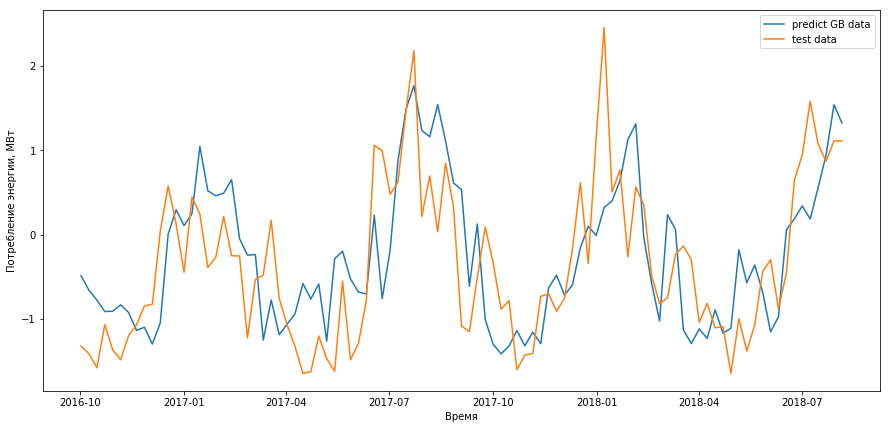

In [127]:

plt.figure( figsize=( 15, 7 ))


plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(test.index[h+p:],y_test_pred_g, label='predict GB data' )
plt.plot(test.index[h+p:],y_test, label='test data')

plt.legend()
plt.show()

**Оценки для сравнения моделей**

Оценим промах модели, используя метрики, которые можно применять для оценки регрессий https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics:
- средне-квадратичное отклонение
- среднюю абсолютную ошибку
- коэфиициент детерминации 

In [128]:
er_s = mean_squared_error(y_true=y_test, y_pred=y_test_pred_g) 
er_a = mean_absolute_error(y_true=y_test, y_pred=y_test_pred_g) 
er_r2 = r2_score(y_true=y_test, y_pred=y_test_pred_g)

print('ошибка mse :  ', er_s,'\nошибка mae  :  ', er_a,'\nоценка R2 :  ', er_r2)

ошибка mse :   0.516672308040345 
ошибка mae  :   0.58409372053776 
оценка R2 :   0.3929673386488338


Абсолютная процентная ошибка (MAPE).Обратите внимание, что определять ее для масштабированной переменной не верно. Пожэтому переведем ответ решателя обратно в состояние без масштаба.

In [129]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [130]:
er_g = mean_absolute_percentage_error(y_true=scl_target.inverse_transform( y_test),y_pred = scl_target.inverse_transform( y_test_pred_g))

print('ошибка градиентного бустинга MAPE :  ', er_g,'%')

ошибка градиентного бустинга MAPE :   7.620827961949201 %


Ошибка неплоха, но мы имеем дело с маленьким горизонтом прогноза и тем неменее пока точность предсказания не превышает 93,3%. 
Построим более точную модель с использованием поиска моделей. Воспользуемся методом поиска 

In [131]:
param_dist = {"max_depth": [3, 2,1,4,5], 
              "n_estimators":[100,200,300,400,500]}

#  randomized search
n_iter_search = 10

model_gr =GradientBoostingRegressor()

random_search = RandomizedSearchCV(model_gr, param_distributions=param_dist, n_iter=n_iter_search, cv=5, iid=False)

random_search.fit(X_train, y_train)

report(random_search.cv_results_)

Model with rank: 1
Mean validation score: 0.449 (std: 0.169)
Parameters: {'n_estimators': 400, 'max_depth': 1}

Model with rank: 2
Mean validation score: 0.431 (std: 0.210)
Parameters: {'n_estimators': 100, 'max_depth': 2}

Model with rank: 3
Mean validation score: 0.405 (std: 0.227)
Parameters: {'n_estimators': 100, 'max_depth': 3}



#### Выбираем модель с рангом 1. {'n_estimators': 400, 'max_depth': 1} и проведем ее обучение на тренировочном наборе.

In [132]:
model_g_best = GradientBoostingRegressor(max_depth=1,  n_estimators=400)
model_g_best.fit( X_train, y_train ) 
y_test_pred_g_best = model_g_best.predict(X_test)

er_g = mean_absolute_percentage_error(y_true=scl_target.inverse_transform( y_test),y_pred = scl_target.inverse_transform( y_test_pred_g_best))
print('ошибка градиентного бустинга MAPE :  ', er_g,'%')

ошибка градиентного бустинга MAPE :   7.777295076115045 %


Качество решения задачи по MAPE чуть снизилось. Очевидно, что диапазон вариаций значений был довольно узким и есть возможность поискать решение в более широком выборе параметров и их значений. Кроме того, провели всего 10 итераций поиска, что также не позволяет гарантировать идеальный ответ. Однако даже в такой версии за несколько минут поиска удается улучшить результат исходной модели. 

## Сохранение модели

In [133]:
import pickle
# save the model to disk
filename = 'final_model4.sav'
pickle.dump(model_g, open(filename, 'wb'))

filename = 'final_scaler_y4.sav'
pickle.dump(scl_target, open(filename, 'wb'))

filename = 'final_scaler_x4.sav'
pickle.dump(scl_x, open(filename, 'wb'))


#### Делаем авторекурсию на новой модели:

In [134]:
diff1_l_scl_mean = scl_x.mean_[12] # Для обратного масштабирования diff1_l нужны параметры

In [135]:
diff1_l_scl_var = scl_x.var_[12]

In [136]:
#['PJME_MW', 'diff1_l', 'exp_0_01', 'exp_0_03', 't11', 't10', 't9', 't8', 't7']

X_test_100 = X_test.copy()
y_test_100 = y_test_pred_g.copy()
N10 = 4
for i in range(N10):
    y_test_100[i] = model_g.predict(X_test_100[i,:].reshape((1,9)))
    # заполняем вектор для прогноза следующей точки
    X_test_100[i+1,0] = y_test_100[i]
    X_test_100[i+1,1] = (np.log(X_test_100[i,0] * diff1_l_scl_var + diff1_l_scl_mean) - diff1_l_scl_mean) / diff1_l_scl_var
    X_test_100[i+1,2] = X_test_100[i+1,0]*(1-0.01)+ 0.01 * X_test_100[i,2] 
    X_test_100[i+1,3] = X_test_100[i+1,0]*(1-0.03)+ 0.03 * X_test_100[i,3]     
    X_test_100[i+1,4] = X_test_100[i+1-11,0]
    X_test_100[i+1,5] = X_test_100[i+1-10,0]
    X_test_100[i+1,6] = X_test_100[i+1-9,0]
    X_test_100[i+1,7] = X_test_100[i+1-8,0]
    X_test_100[i+1,8] = X_test_100[i+1-7,0]

In [137]:
er_g = mean_absolute_percentage_error(y_true=scl_target.inverse_transform( y_test[:N10]),y_pred = scl_target.inverse_transform( y_test_100[:N10]))
print('ошибка градиентного бустинга MAPE :  ', er_g,'%')

ошибка градиентного бустинга MAPE :   23.58962068983404 %


### Сравниваем результат с авторекурсией

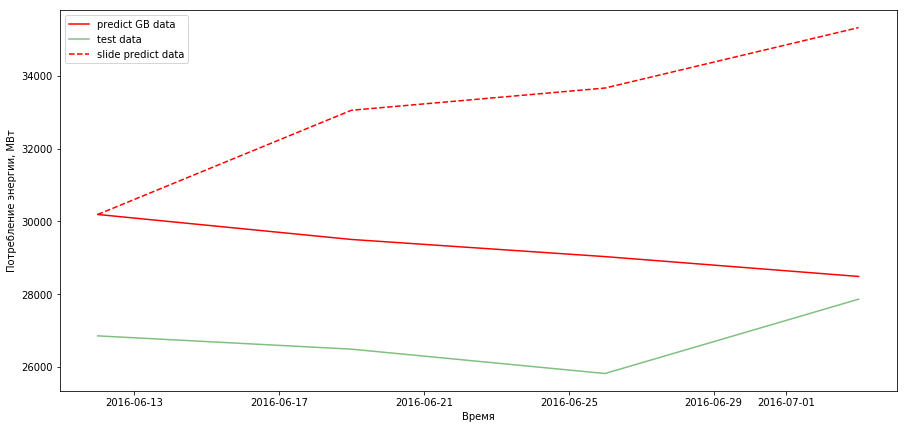

In [138]:
plt.figure( figsize=( 15, 7 ))


plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(test.index[1:N10+1],scl_target.inverse_transform(y_test_pred_g[:N10]), 'r',label='predict GB data' )
plt.plot(test.index[1:N10+1],scl_target.inverse_transform(y_test[:N10]), 'g',label='test data', alpha=0.5)
plt.plot(test.index[1:N10+1],scl_target.inverse_transform(y_test_100[:N10]), '--r',label='slide predict data')

plt.legend()
plt.show()    

В данном случае авторекурсия сработала значительно хуже, на 4 точках.

5.Оцениваем рост ошибки прогнозирования рекурсивной модели в интервалах от 1-й до 10-й, от 10-й до 20-й, от 20-й до 30-й, .. .10*i-й до (i+1)*10 -й,... ,от 90 до 100-й точках (используйте осреденение по десяткам точек)

In [141]:
y_test.shape

(97,)

In [143]:
#['PJME_MW', 'diff1_l', 'exp_0_01', 'exp_0_03', 't11', 't10', 't9', 't8', 't7']

X_test_100 = X_test.copy()
y_test_100 = y_test_pred_g.copy()
N10 = 97
for i in range(N10):
    y_test_100[i] = model_g.predict(X_test_100[i,:].reshape((1,9)))
    if i < N10 - 1:
        # заполняем вектор для прогноза следующей точки
        X_test_100[i+1,0] = y_test_100[i]
        X_test_100[i+1,1] = (np.log(X_test_100[i,0] * diff1_l_scl_var + diff1_l_scl_mean) - diff1_l_scl_mean) / diff1_l_scl_var
        X_test_100[i+1,2] = X_test_100[i+1,0]*(1-0.01)+ 0.01 * X_test_100[i,2] 
        X_test_100[i+1,3] = X_test_100[i+1,0]*(1-0.03)+ 0.03 * X_test_100[i,3]     
        X_test_100[i+1,4] = X_test_100[i+1-11,0]
        X_test_100[i+1,5] = X_test_100[i+1-10,0]
        X_test_100[i+1,6] = X_test_100[i+1-9,0]
        X_test_100[i+1,7] = X_test_100[i+1-8,0]
        X_test_100[i+1,8] = X_test_100[i+1-7,0]

In [144]:
er_g = mean_absolute_percentage_error(y_true=scl_target.inverse_transform( y_test[:N10]),y_pred = scl_target.inverse_transform( y_test_100[:N10]))
print('ошибка градиентного бустинга MAPE :  ', er_g,'%')

ошибка градиентного бустинга MAPE :   12.40730081605996 %


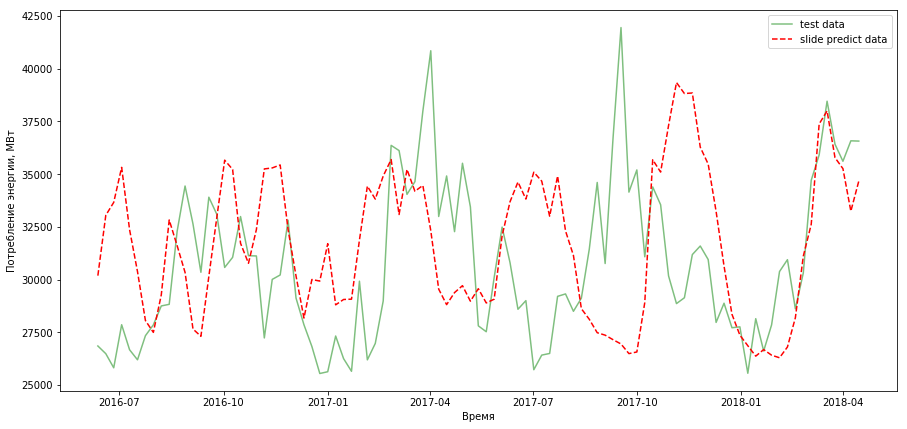

In [145]:
plt.figure( figsize=( 15, 7 ))


plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
# plt.plot(test.index[1:N10+1],scl_target.inverse_transform(y_test_pred_g[:N10]), 'r',label='predict GB data' )
plt.plot(test.index[1:N10+1],scl_target.inverse_transform(y_test[:N10]), 'g',label='test data', alpha=0.5)
plt.plot(test.index[1:N10+1],scl_target.inverse_transform(y_test_100[:N10]), '--r',label='slide predict data')

plt.legend()
plt.show()    

In [146]:
y_test

array([-1.31914188, -1.41035728, -1.57764878, -1.0670431 , -1.36386634,
       -1.48302711, -1.19691862, -1.06899858, -0.8445012 , -0.82517115,
        0.04021668,  0.57747428,  0.12758512, -0.445447  ,  0.44469085,
        0.24343746, -0.38793901, -0.26849866,  0.21546104, -0.2490689 ,
       -0.25180567, -1.22384288, -0.52955929, -0.47731874,  0.17169645,
       -0.75123358, -1.06735116, -1.32482972, -1.64531513, -1.62425729,
       -1.20087868, -1.46897099, -1.61916025, -0.55089244, -1.48332455,
       -1.28861917, -0.78516423,  1.05940261,  0.99762799,  0.47844292,
        0.62889112,  1.46378452,  2.18103827,  0.21604887,  0.69655747,
        0.0365096 ,  0.84722741,  0.32995912, -1.0803341 , -1.15030564,
       -0.50604148,  0.09047273, -0.33134477, -0.88358097, -0.78147948,
       -1.6004091 , -1.42723629, -1.40750998, -0.7307234 , -0.70184514,
       -0.90793961, -0.75200595, -0.1704495 ,  0.61959889, -0.34163112,
        1.15008078,  2.45572027,  0.50505467,  0.76822257, -0.26

In [147]:
y_test[0:10]

array([-1.31914188, -1.41035728, -1.57764878, -1.0670431 , -1.36386634,
       -1.48302711, -1.19691862, -1.06899858, -0.8445012 , -0.82517115])

In [148]:
for i in range(10):
    if i<9:
        er_g = mean_absolute_percentage_error(y_true=scl_target.inverse_transform( y_test[i*10:i*10+10]),y_pred = scl_target.inverse_transform( y_test_100[i*10:i*10+10]))
        print('ошибка градиентного бустинга MAPE :  ', er_g,'% на ', i, ' десятке')
    else:
        er_g = mean_absolute_percentage_error(y_true=scl_target.inverse_transform( y_test[i*10:N10]),y_pred = scl_target.inverse_transform( y_test_100[i*10:N10]))
        print('ошибка градиентного бустинга MAPE :  ', er_g,'% на последних 7 точках')        

ошибка градиентного бустинга MAPE :   15.126864348847485 % на  0  десятке
ошибка градиентного бустинга MAPE :   8.591594680503079 % на  1  десятке
ошибка градиентного бустинга MAPE :   12.712000911889376 % на  2  десятке
ошибка градиентного бустинга MAPE :   12.690339509973642 % на  3  десятке
ошибка градиентного бустинга MAPE :   10.93213866500064 % на  4  десятке
ошибка градиентного бустинга MAPE :   17.368746781887122 % на  5  десятке
ошибка градиентного бустинга MAPE :   16.898107585080872 % на  6  десятке
ошибка градиентного бустинга MAPE :   18.04663619819003 % на  7  десятке
ошибка градиентного бустинга MAPE :   5.148363565635643 % на  8  десятке
ошибка градиентного бустинга MAPE :   4.05146524110531 % на последних 7 точках



6.Сделайте вывод о том, как изменилось поведение ошибки предсказания ряда.

В теории, ошибка должна была расти, и это происходит до 7го десятка. Далее на последних 17 точках - ошибка снижается до минимальных значений.  Причина, предположительно - отсутствие тренда, и "угаданная" сезонность в конце ряда. 